In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('file:///C:/Users/dipam/Downloads/online+retail/Online%20Retail.xlsx')

In [6]:
print('No of instances before removing duplicates :',df.shape)
df.drop_duplicates
print('No of instances after removing duplicates :',df.shape)
df.head()

No of instances before removing duplicates : (541909, 8)
No of instances after removing duplicates : (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# As the different countries have different purchasing behaviour and most pf the records belong from UK,So i will work on this sample

In [7]:
df_new = df[df['Country'] == 'United Kingdom']

In [8]:
df_new.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [11]:
#df['CustomerID'] = df['CustomerID'].astype(int)

In [12]:
df_new.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
#remove canceled orders if present
df_new = df_new[df_new['Quantity']>0]
df_new.shape

(486286, 8)

In [14]:
#remove rows where customerID are NA
df_new.dropna(subset=['CustomerID'],how='all',inplace=True)
df_new.shape

(354345, 8)

In [15]:
df_new.dropna(subset=['CustomerID'],how='all',inplace=True)
df_new.shape

(354345, 8)

In [16]:
df_new['InvoiceDate'].sort_values()

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541879   2011-12-09 12:31:00
541892   2011-12-09 12:49:00
541890   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541893   2011-12-09 12:49:00
Name: InvoiceDate, Length: 354345, dtype: datetime64[ns]

In [17]:
df_new = df_new[df_new['InvoiceDate']>= "2010-12-09"]
df_new.shape

(342478, 8)

In [18]:
#exploring the unique values of each attribute
print("Number of transactions: ", df_new['InvoiceNo'].nunique())
print("Number of customers:", df_new['CustomerID'].nunique())
print("Number of Product:", df_new['Description'].nunique())
print("Country:", df_new['Country'].nunique())

Number of transactions:  16017
Number of customers: 3863
Number of Product: 3799
Country: 1


# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase
FREQUENCY (F):How often purhcase
MONETARY VALUE (M): Total money customer spent.

In [19]:
print(df_new['InvoiceDate'].max())
print(df_new['InvoiceDate'].min())

2011-12-09 12:49:00
2010-12-09 08:34:00


In [20]:
df_new['date'] = pd.DatetimeIndex(df_new['InvoiceDate']).date

In [21]:
df_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date'],
      dtype='object')

In [22]:
df_new.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
date                   object
dtype: object

In [23]:
df_new['date']

19632     2010-12-09
19633     2010-12-09
19634     2010-12-09
19635     2010-12-09
19636     2010-12-09
             ...    
541889    2011-12-09
541890    2011-12-09
541891    2011-12-09
541892    2011-12-09
541893    2011-12-09
Name: date, Length: 342478, dtype: object

In [24]:
df_new['date'] = pd.to_datetime(df_new['date']).dt.date


In [25]:
df_new['month'] = pd.to_datetime(df_new['date']).dt.month


In [26]:
df_new['month'].head()

19632    12
19633    12
19634    12
19635    12
19636    12
Name: month, dtype: int64

# Recency

In [27]:
recency= df_new.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastPurshaceDate']
recency.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [28]:
import datetime as dt
present = dt.date(2011,12,9)

In [29]:
recency.columns

Index(['CustomerID', 'LastPurshaceDate'], dtype='object')

In [30]:
#calculate recency in days
recency['Recency'] =recency['LastPurshaceDate'].apply(lambda x: (present- x).days)

In [31]:
recency[['Recency','CustomerID']].head()

,Recency,CustomerID
0,325,12346.0
1,2,12747.0
2,0,12748.0
3,3,12749.0
4,3,12820.0


In [32]:
recency.columns

Index(['CustomerID', 'LastPurshaceDate', 'Recency'], dtype='object')

In [33]:
#drop LastPurchaseDate as we don't need it anymore
recency.drop(['LastPurshaceDate'],axis=1,inplace=True)

<Axes: xlabel='Recency', ylabel='Count'>

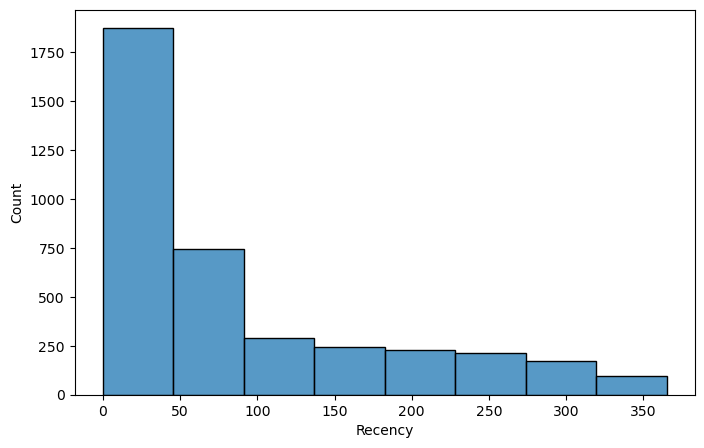

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(recency.Recency,bins=8)

# Frequency

In [35]:
df_new.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
frequency = df_new.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,196
3,12749.0,5
4,12820.0,4


<Axes: xlabel='Frequency', ylabel='Count'>

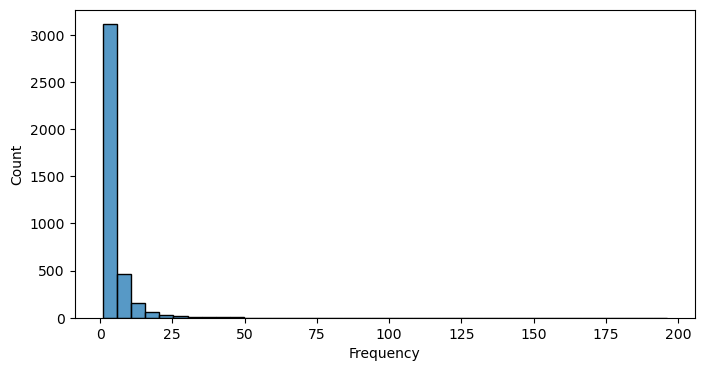

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(frequency['Frequency'],bins=40)

In [37]:
frequency[['CustomerID','Frequency']].head(20)

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,196
3,12749.0,5
4,12820.0,4
5,12821.0,1
6,12822.0,2
7,12823.0,5
8,12824.0,1
9,12826.0,7


# Monetary

In [38]:
df_new['TotalCost'] = df_new['Quantity'] * df_new['UnitPrice']

In [39]:
monetary =df_new.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'mean'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.600000
1,12747.0,65.889000
2,12748.0,19.077704
3,12749.0,19.670000
4,12820.0,14.550000


<Axes: xlabel='Monetary', ylabel='Count'>

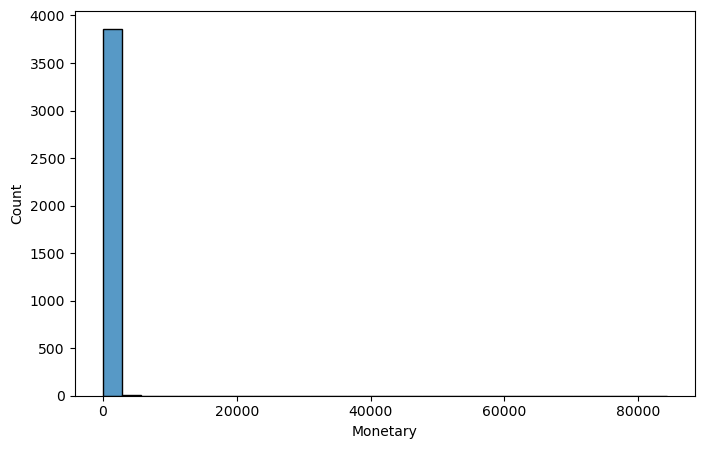

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(monetary['Monetary'],bins=30)

# Lets see how RFM works with Date Field and if we can find any interesting facts

In [41]:
df1=recency.merge(frequency,on='CustomerID')

In [42]:
df2=monetary.merge(df1,on='CustomerID')

In [43]:
df2.head()

,CustomerID,Monetary,Recency,Frequency
0,12346.0,77183.600000,325,1
1,12747.0,65.889000,2,10
2,12748.0,19.077704,0,196
3,12749.0,19.670000,3,5
4,12820.0,14.550000,3,4


In [44]:
df3=df2.merge(df_new,on='CustomerID',how='outer')

In [45]:
df3.columns

Index(['CustomerID', 'Monetary', 'Recency', 'Frequency', 'InvoiceNo',
       'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'date', 'month', 'TotalCost'],
      dtype='object')

<Axes: xlabel='month', ylabel='Frequency'>

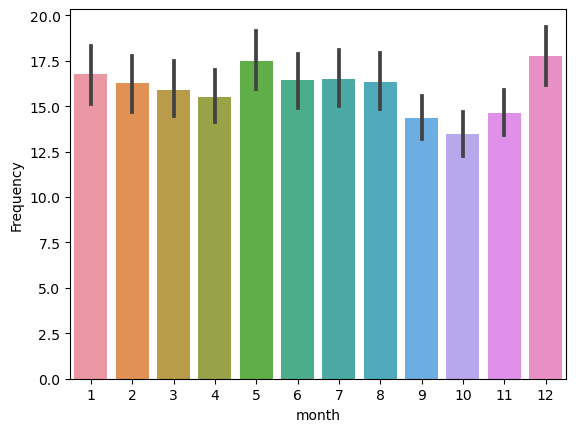

In [46]:
sns.barplot(data=df3,x='month',y='Frequency')

In [47]:
#In the month of may and december have the higher frequency than other months

<Axes: xlabel='month', ylabel='Monetary'>

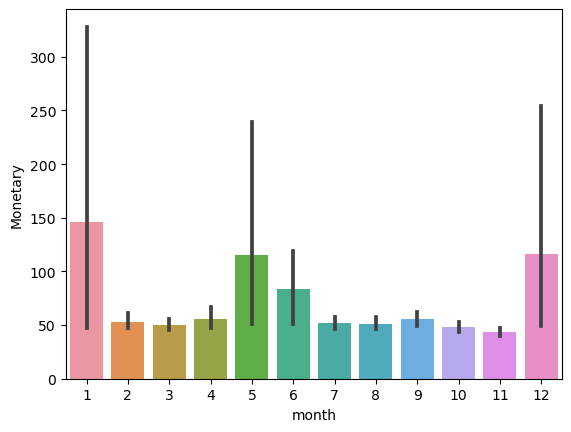

In [48]:
sns.barplot(data=df3,x='month',y='Monetary')

In [49]:
#In the month of january,may,december on an average customer spent more monetary value

In [50]:
df3['date'] = pd.to_datetime(df3['date'])
df3['weekday'] = df3['date'].dt.dayofweek
df3['weekend'] = df3['weekday'].isin([5,6])

In [51]:
df3['weekday'].unique()

array([1, 0, 3, 2, 4, 6], dtype=int64)

In [52]:
df3['weekend'].unique()

array([False,  True])

<Axes: xlabel='weekend', ylabel='Monetary'>

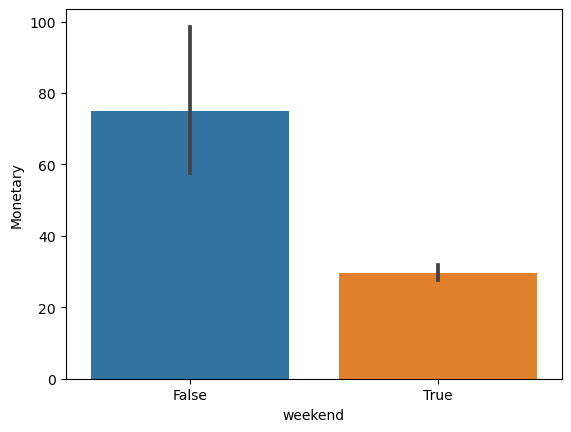

In [53]:
sns.barplot(x=df3['weekend'],y=df3['Monetary'])

In [54]:
weekday_monetary = df3.loc[df3['weekday'].isin([0, 1, 2, 3, 4]), 'Monetary']
weekend_monetary = df3.loc[df3['weekday'].isin([5, 6]), 'Monetary']
print("Mean Monetary value (Weekdays):", weekday_monetary.mean())
print("Mean Monetary value (Weekends):", weekend_monetary.mean())

Mean Monetary value (Weekdays): 75.06812591247011
Mean Monetary value (Weekends): 29.651415330820264


In [55]:
#People spent avg monetary value on weekdays more than weekend

<Axes: xlabel='weekend', ylabel='Frequency'>

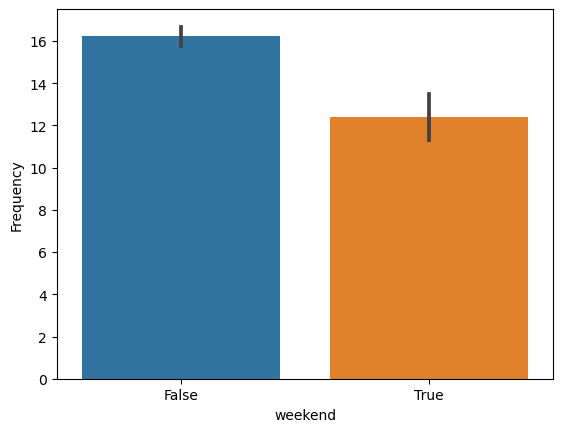

In [56]:
sns.barplot(x=df3['weekend'],y=df3['Frequency'])

In [57]:
weekday_monetary = df3.loc[df3['weekday'].isin([0, 1, 2, 3, 4]), 'Frequency']
weekend_monetary = df3.loc[df3['weekday'].isin([5, 6]), 'Frequency']
print("Mean Monetary value (Weekdays):", weekday_monetary.mean())
print("Mean Monetary value (Weekends):", weekend_monetary.mean())

Mean Monetary value (Weekdays): 16.21754286120794
Mean Monetary value (Weekends): 12.385204081632653


In [58]:
#Frequency is also slightly high on weekdays

<Axes: xlabel='weekday', ylabel='Monetary'>

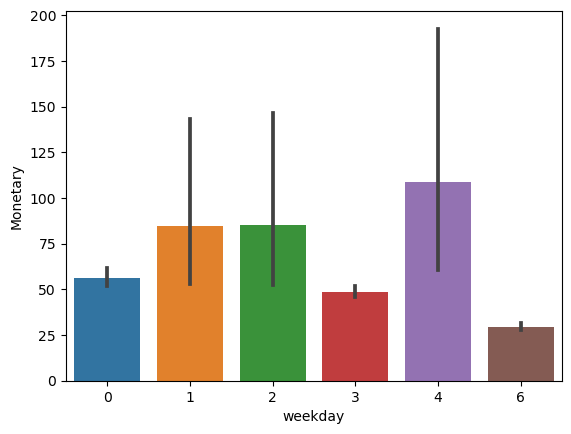

In [59]:
sns.barplot(x=df3['weekday'],y=df3['Monetary'])

In [60]:
weekday_monetary_mean = df3.groupby('weekday')['Monetary'].mean()
print(weekday_monetary_mean)

weekday
0     56.385508
1     84.646641
2     85.306298
3     48.514864
4    108.585992
6     29.651415
Name: Monetary, dtype: float64


In [61]:
#customers spent on an avg monetary more value on Friday

<Axes: xlabel='weekday', ylabel='Frequency'>

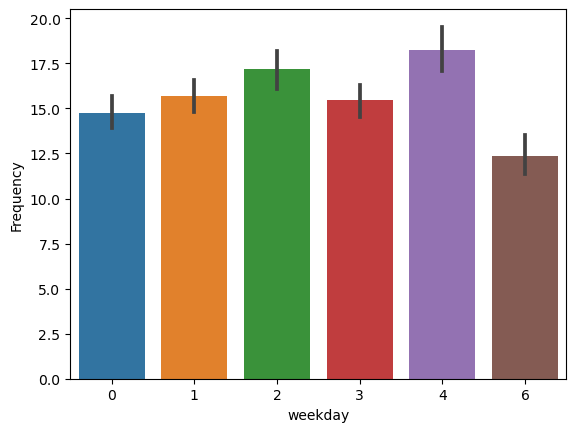

In [88]:
sns.barplot(x=df3['weekday'],y=df3['Frequency'])

In [63]:
weekday_monetary_mean = df3.groupby('weekday')['Frequency'].mean()
print(weekday_monetary_mean)


weekday
0    14.770698
1    15.666430
2    17.189763
3    15.448773
4    18.267351
6    12.385204
Name: Frequency, dtype: float64


In [64]:
#Though frequency is high on tuesday but the monetary is less and friday has the highest frequency

# Relationship with Recency,Frequency,Monetary

<Axes: xlabel='Recency', ylabel='Frequency'>

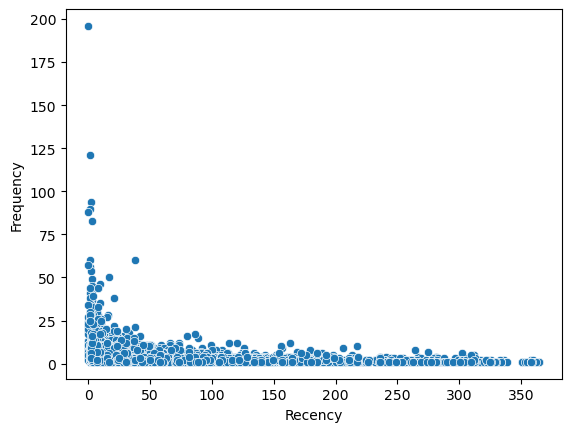

In [65]:
sns.scatterplot(df2,x='Recency',y='Frequency')

In [66]:
#People came recently visited more frequently compare to oldest customers.

<Axes: xlabel='Frequency', ylabel='Monetary'>

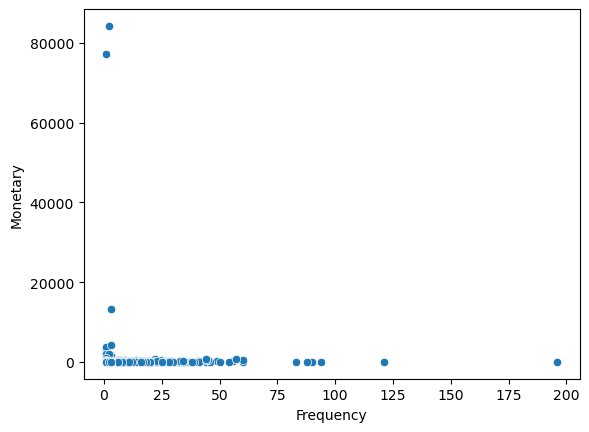

In [67]:
sns.scatterplot(df2,x='Frequency',y='Monetary')

In [68]:
#Less frequent people spent more monetary value.

<Axes: xlabel='Recency', ylabel='Monetary'>

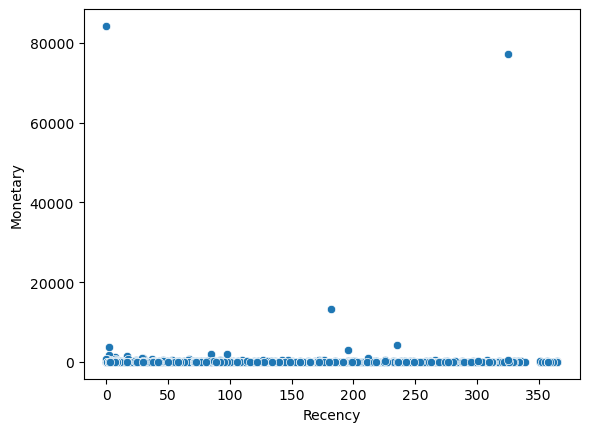

In [69]:
sns.scatterplot(df2,x='Recency',y='Monetary')

# Recency Bucket

In [70]:
percentiles = [ 0.33,0.66]
recency_percentiles = df2['Recency'].quantile(percentiles)
print(recency_percentiles[0.33])
print(recency_percentiles[0.66])

24.0
85.0


In [71]:
def R_Score(x):
    if x['Recency'] < 24:
        recency = 3
    elif x['Recency'] >=25  and x['Recency'] <= 85:
        recency = 2
    else:
        recency = 1
    return recency

In [72]:
df2['R_Score'] = df2.apply(R_Score,axis=1)

In [73]:
df2.head()

,CustomerID,Monetary,Recency,Frequency,R_Score
0,12346.0,77183.600000,325,1,1
1,12747.0,65.889000,2,10,3
2,12748.0,19.077704,0,196,3
3,12749.0,19.670000,3,5,3
4,12820.0,14.550000,3,4,3


In [74]:
df2['R_Score'].unique()

array([1, 3, 2], dtype=int64)

# Frequency Bucket

In [75]:
percentiles = [0.33, 0.66]
Frequency_Percentile = df2['Frequency'].quantile(percentiles)
print(Frequency_Percentile[0.33])
print(Frequency_Percentile[0.66])

1.0
4.0


In [76]:
def F_Score(x):
    if x['Frequency'] <= 2:
        frequency = 1
    elif x['Frequency'] >=3  and x['Frequency'] <= 5:
        frequency = 2
    else:
        frequency = 3
    return frequency

In [77]:
df2['F_Score'] = df2.apply(F_Score,axis=1)

In [78]:
df2[['CustomerID','R_Score','F_Score']].head(5)

,CustomerID,R_Score,F_Score
0,12346.0,1,1
1,12747.0,3,3
2,12748.0,3,3
3,12749.0,3,2
4,12820.0,3,2


# Monetary Bucket

In [79]:
percentiles = [0.33, 0.66]
Monetary_Percentile = df2['Monetary'].quantile(percentiles)
print(Monetary_Percentile[0.33])
print(Monetary_Percentile[0.66])

14.069199999999999
23.86613333333333


In [80]:
def M_Score(x):
    if x['Monetary'] < 14:
        Monetary = 1
    elif x['Monetary'] >=15  and x['Monetary'] <= 23:
        Monetary = 2
    else:
        Monetary = 3
    return Monetary

In [81]:
df2['M_Score'] = df2.apply(M_Score,axis=1)

In [82]:
df2[['CustomerID','R_Score','F_Score','M_Score']].head(20)

,CustomerID,R_Score,F_Score,M_Score
0,12346.0,1,1,3
1,12747.0,3,3,3
2,12748.0,3,3,2
3,12749.0,3,2,2
4,12820.0,3,2,3
5,12821.0,1,1,2
6,12822.0,2,1,2
7,12823.0,2,2,3
8,12824.0,2,1,1
9,12826.0,3,3,2


# RFM CALCULATION

In [83]:
df2['RFMScore'] = df2.R_Score.map(str) \
                            + df2.F_Score.map(str) \
                            + df2.M_Score.map(str)
df2.head(15)

,CustomerID,Monetary,Recency,Frequency,R_Score,F_Score,M_Score,RFMScore
0,12346.0,77183.600000,325,1,1,1,3,113
1,12747.0,65.889000,2,10,3,3,3,333
2,12748.0,19.077704,0,196,3,3,2,332
3,12749.0,19.670000,3,5,3,2,2,322
4,12820.0,14.550000,3,4,3,2,3,323
5,12821.0,19.920000,214,1,1,1,2,112
6,12822.0,15.400000,70,2,2,1,2,212
7,12823.0,351.900000,74,5,2,2,3,223
8,12824.0,5.040000,59,1,2,1,1,211
9,12826.0,17.542857,2,7,3,3,2,332


# Segmentation

In [84]:
print("Champions: ",len(df2[df2['RFMScore']=='333']))
print('Loyal Customers: ',len(df2[df2['RFMScore']=='233']) + len(df2[df2['RFMScore']=='332']))
print('Potential Loyalists: ',len(df2[df2['RFMScore']=='133'])  + len(df2[df2['RFMScore']=='232']))
print('At Risk: ',len(df2[df2['RFMScore']=='113'])  + len(df2[df2['RFMScore']=='213'])+ len(df2[df2['RFMScore']=='313']))
print("Can't lose them: ", len(df2[df2['RFMScore']=='111']))
print('Hibernating: ',len(df2[df2['RFMScore']=='121'])  + len(df2[df2['RFMScore']=='221'])+ len(df2[df2['RFMScore']=='321']))
print("Lost Customers: ",len(df2[df2['RFMScore']=='112'])  + len(df2[df2['RFMScore']=='212'])+ len(df2[df2['RFMScore']=='312']))
print('New Customers:', len(df2[df2['RFMScore'] == '311']) + len(df2[df2['RFMScore'] == '211']) + len(df2[df2['RFMScore'] == '111']))

Champions:  268
Loyal Customers:  223
Potential Loyalists:  88
At Risk:  686
Can't lose them:  363
Hibernating:  322
Lost Customers:  618
New Customers: 775
